In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv('covid.csv')

In [2]:
data.head()

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False


In [4]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
pc_encoded=le.fit_transform(data['pc'].values)
wbc_encoded=le.fit_transform(data['wbc'].values)
mc_encoded=le.fit_transform(data['mc'].values)
ast_encoded=le.fit_transform(data['ast'].values)
bc_encoded=le.fit_transform(data['bc'].values)
ldh_encoded=le.fit_transform(data['ldh'].values)
Y=le.fit_transform(data['diagnosis'].values)

In [5]:
X=np.array(list(zip(pc_encoded,wbc_encoded,mc_encoded,ast_encoded,bc_encoded,ldh_encoded)))

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
model=MultinomialNB()

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [8]:
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

In [9]:
print("Accuracy:",accuracy_score(Y_test,y_pred))

Accuracy: 0.6


In [10]:
print("Report :\n")
print(classification_report(Y_test,y_pred))

Report :

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      1.00      0.67         2

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



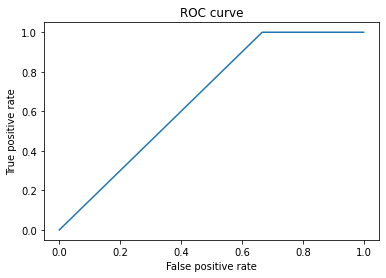

AUC of the predictions : {0} 0.6666666666666667


In [12]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr,tpr,thresholds=metrics.roc_curve(Y_test,y_pred,pos_label=1)
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
print("AUC of the predictions : {0}",format(metrics.auc(fpr,tpr)))